In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/food_energy_detection/requeriment.txt" ./requeriment.txt

In [ ]:
!pip install -r requeriment.txt
!pip install "pillow<7.0.0"

     |████████████████████████████████| 591.8MB 28kB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 92kB 13.8MB/s 
     |████████████████████████████████| 163kB 58.0MB/s 
     |████████████████████████████████| 81kB 13.8MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26310 sha256=2403788ae8dff93e334434d82b80c59243794212e31fac28e48f24b15af57a93
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built typing
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
  Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2
  Found existing installation: fast

     |████████████████████████████████| 2.1MB 12.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
import pandas as pd
import requests
import glob
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
!tar -xf "/content/drive/MyDrive/food_energy_detection/food-110.tar.gz" -C /content/

In [ ]:
!ls ./images | head -n 5

apple_pie
baby_back_ribs
baklava
barbecue
bean_curd


read the images 

In [ ]:
path = Path("images")

In [ ]:
tfms = get_transforms(max_rotate=10,
                      max_zoom=1.1,
                      max_lighting=None,
                      max_warp=0.2,
                      xtra_tfms=[
                          brightness(change=(0.5-0.2, 0.5+0.2), p=0.75),
                          contrast(scale=(1-0.4, 1+0.2), p=0.75),
                          squish(scale=(1-0.3, 1+0.5), p=0.75),
                          skew(direction=(0, 7), magnitude=random.randint(0,6)/10, p=0.75),]
                      )

In [8]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=tfms, size=256, num_workers=8, bs=64).normalize(imagenet_stats)

In [9]:
def get_ex(filepath):
    return open_image(filepath)

def plots_f(rows, cols, width, height, filepath, **kwargs):
    # code to apply transformation function multiple times
    [get_ex(filepath).apply_tfms(data.train_ds.tfms, **kwargs).show(ax=ax) for i, ax in enumerate(plt.subplots(
                                                                        rows, cols, figsize=(width, height))[1].flatten())]

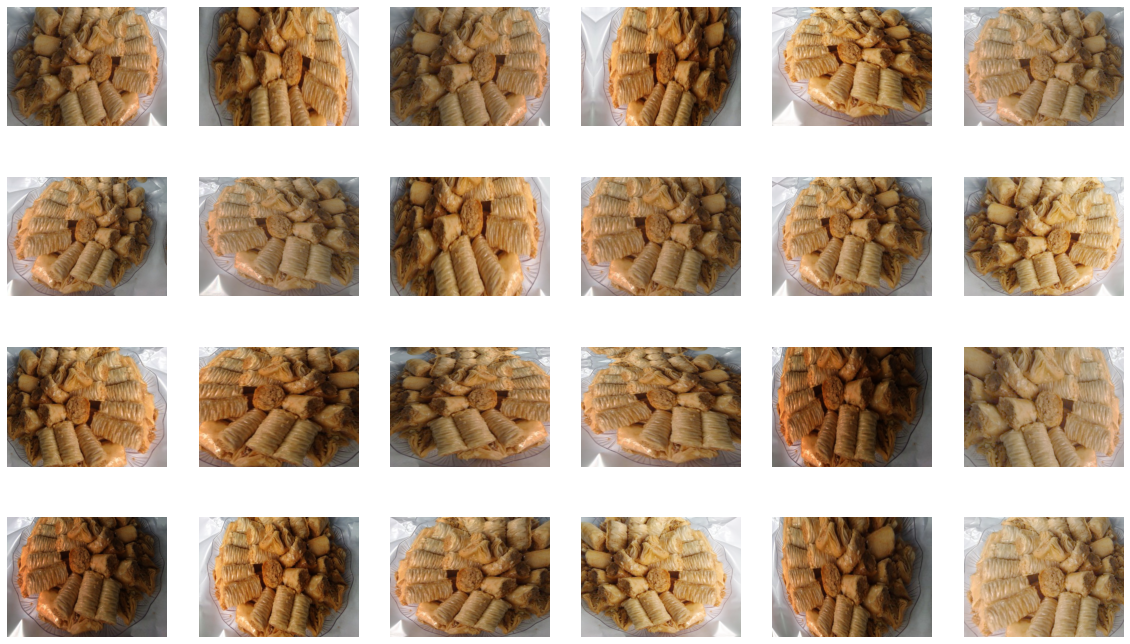

In [10]:
plots_f(4, 6, 20, 12, "/content/images/baklava/176061.jpg")

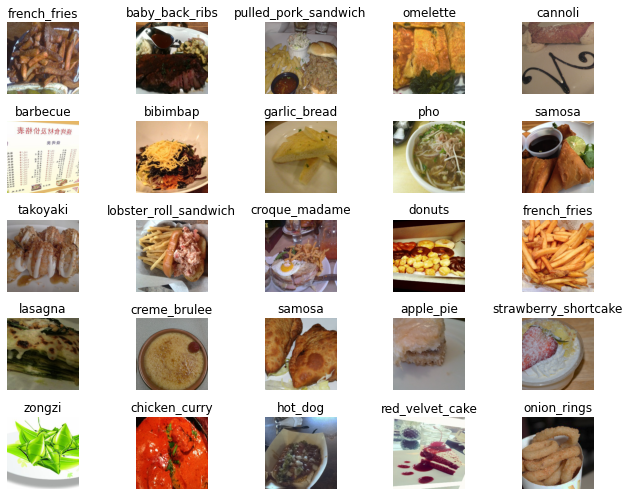

In [ ]:
data.show_batch(row=3, figsize=(9, 7))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'barbecue',
  'bean_curd',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fired_rice',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_chicken',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'glutinous_rice_balls',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
torch.backends.cudnn.benchmark = False

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


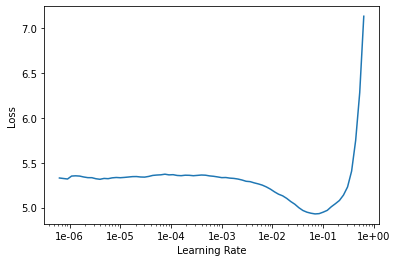

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
#learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="../../prod")
#learn.model = torch.nn.DataParallel(learn.model)


In [ ]:
lr = 1e-2

In [ ]:
learn.fit_one_cycle(8 , lr)

In [ ]:
!cp -r "/content/drive/MyDrive/food_energy_detection/modeles_res101" ./images/models

In [ ]:
model_name="sqeenzenet_res34_tsfmed"

In [ ]:
learn.save(f'{model_name}-stage-1')

In [ ]:
!cp -r  ./images/models "/content/drive/MyDrive/food_energy_detection/modeles_res34_tsfmed"

In [ ]:
while True:
    pass

KeyboardInterrupt: ignored

In [ ]:
learn.load(f'{model_name}-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (26365 items)
[Category edamame, Category edamame, Category edamame, Category edamame, Category edamame]...
Path: images
x: ImageItemList (26365 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512)]...
Path: images;

Valid: LabelList
y: CategoryList (6591 items)
[Category beef_carpaccio, Category zongzi, Category fish_and_chips, Category oysters, Category hamburger]...
Path: images
x: ImageItemList (6591 items)
[Image (3, 512, 512), Image (3, 384, 512), Image (3, 306, 512), Image (3, 384, 512), Image (3, 512, 382)]...
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4):

In [ ]:
learn.unfreeze()


In [ ]:
learn.lr_find(start_lr=1e-09, end_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


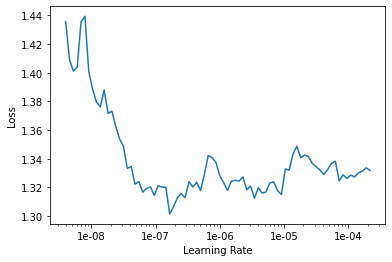

In [ ]:
learn.recorder.plot(skip_end=10)


In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-8,1e-4))

In [ ]:
learn.save(f'{model_name}-stage-2')
learn.save(f'{model_name}-stage-2', True)
!cp -r ./images/models "/content/drive/MyDrive/food_energy_detection/res34_models2_tsfmed"

In [ ]:
while True:
    pass

KeyboardInterrupt: ignored

In [ ]:
learn.load(f'{model_name}-stage-2');

In [ ]:
learn.load(final_model_name);

In [ ]:
learn.data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'barbecue',
 'bean_curd',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fired_rice',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_chicken',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'glutinous_rice_balls',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hand-Pulled_noodle',
 'hot_and_so

In [ ]:
data2 = ImageDataBunch.single_from_classes(path, data.classes
                                           , tfms=get_transforms()
                                           , size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load(final_model_name)

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (0 items)
[]...
Path: images
x: ImageItemList (0 items)
[]...
Path: images;

Valid: LabelList
y: CategoryList (0 items)
[]...
Path: images
x: ImageItemList (0 items)
[]...
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [ ]:
data2.classes, data2.c

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'barbecue',
  'bean_curd',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fired_rice',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_chicken',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'glutinous_rice_balls',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  

**bibimbap**

In [ ]:
bibimbap_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Dolsot-bibimbap.jpg/1200px-Dolsot-bibimbap.jpg"

In [ ]:
#!wget {url} -O sample.jpg

In [ ]:
url = bibimbap_url

In [ ]:
def fetch_image(url):
    response = requests.get(url)
    img = open_image(BytesIO(response.content))
    return img

In [ ]:
img = fetch_image(bibimbap_url)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class , pred_idx, outputs

(Category bibimbap,
 tensor(9),
 tensor([8.4934e-08, 8.7628e-07, 2.3662e-06, 4.3463e-06, 1.3858e-03, 1.1753e-07,
         2.7535e-07, 1.6002e-05, 2.7676e-08, 9.1366e-01, 1.9235e-07, 8.1295e-08,
         2.2668e-08, 3.4059e-04, 6.2034e-08, 1.9970e-07, 8.7669e-07, 2.0047e-06,
         5.0275e-08, 8.7191e-09, 7.1669e-05, 8.5201e-08, 1.1091e-07, 4.7996e-06,
         1.7158e-05, 3.6020e-07, 5.4990e-07, 1.8314e-06, 9.1214e-08, 2.3556e-07,
         2.6643e-07, 1.0097e-06, 1.1934e-07, 4.8715e-08, 1.1735e-04, 4.8802e-06,
         4.6606e-08, 1.2481e-05, 3.8723e-06, 8.0532e-06, 4.4931e-05, 1.1606e-07,
         6.7292e-07, 2.0899e-06, 3.8950e-06, 6.7243e-08, 4.2675e-07, 5.4814e-06,
         9.3092e-05, 1.1262e-05, 6.6743e-08, 1.2103e-05, 7.4366e-06, 1.0345e-06,
         2.5433e-07, 5.4092e-06, 7.4578e-05, 3.1292e-07, 1.0762e-07, 7.4255e-02,
         4.5454e-06, 7.1577e-08, 1.5556e-03, 3.1208e-06, 3.8826e-04, 3.5808e-06,
         2.2554e-07, 2.6465e-06, 2.8737e-08, 2.4058e-05, 1.3672e-07, 1.8195e-

In [ ]:
def predict(url):
    img = fetch_image(url)
    pred_class,pred_idx,outputs = learn.predict(img)
    res =  zip (learn.data.classes, outputs.tolist())
    predictions = sorted(res, key=lambda x:x[1], reverse=True)
    top_predictions = predictions[0:5]
    pprint.pprint( top_predictions)
    return img.resize(500)

**Baby Back Rib**

In [ ]:
baby_back_url ="https://upload.wikimedia.org/wikipedia/commons/e/ee/Baby_back_ribs_with_fries.jpg"

[('baby_back_ribs', 0.6830984950065613),
 ('steak', 0.08070184290409088),
 ('pulled_pork_sandwich', 0.07395433634519577),
 ('fish_and_chips', 0.046529170125722885),
 ('filet_mignon', 0.027578255161643028)]


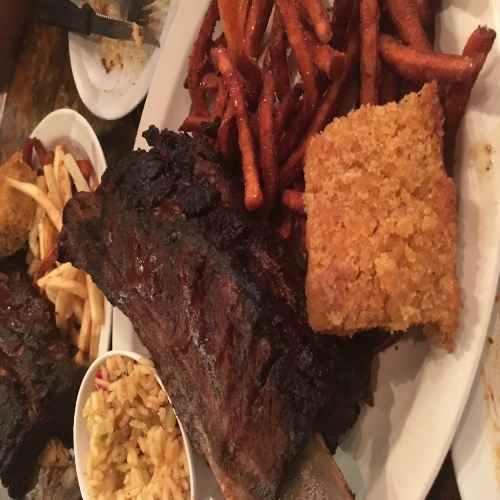

In [ ]:
predict(baby_back_url)

**Cat**

In [ ]:
cat_image_url = "https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492__480.jpg"

[('zongzi', 0.7897549271583557),
 ('ice_cream', 0.049506980925798416),
 ('bean_curd', 0.03320060297846794),
 ('glutinous_rice_balls', 0.01641898602247238),
 ('pho', 0.011926893144845963)]


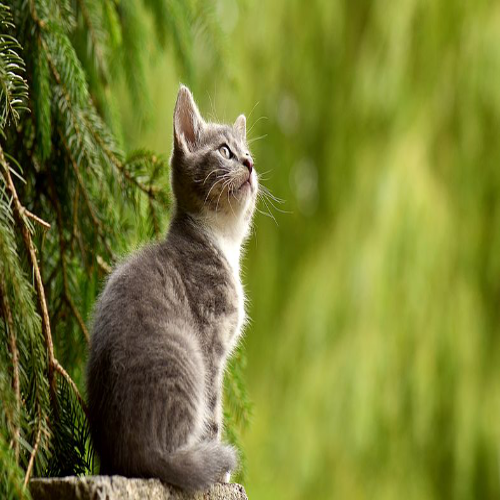

In [ ]:
predict(cat_image_url)

**Icecream**

In [ ]:
icecream_url = "https://upload.wikimedia.org/wikipedia/commons/3/31/Ice_Cream_dessert_02.jpg"

[('frozen_yogurt', 0.47590741515159607),
 ('ice_cream', 0.3929654657840729),
 ('chocolate_mousse', 0.07060010731220245),
 ('bread_pudding', 0.011404134333133698),
 ('tiramisu', 0.00797223299741745)]


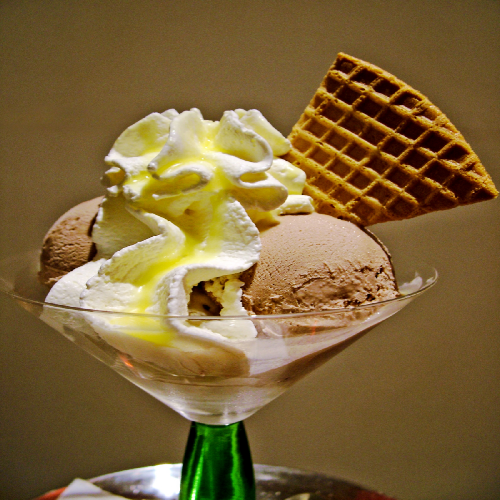

In [ ]:
predict(icecream_url)

**Banana**

In [ ]:
banana_url = "https://upload.wikimedia.org/wikipedia/commons/d/de/Bananavarieties.jpg"

[('caprese_salad', 0.14192451536655426),
 ('edamame', 0.11999643594026566),
 ('spring_rolls', 0.10773986577987671),
 ('foie_gras', 0.10302098840475082),
 ('cheese_plate', 0.08321233093738556)]


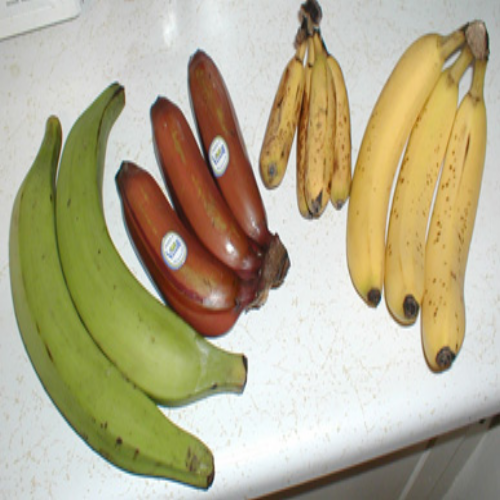

In [ ]:
predict(banana_url)